# SIT720 Assignment 2
<p>*Student Name: Dhananjay Pandya*</p>
*Student Number: 218202943*
## All packages required for this assignment are as follows:

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier

## Part 1: Binary Classification
### 1.1: Data Munging
Objectives: 
1. Read the training & testing data
2. Print the number of features
3. For the data label, print the number of 1's and 0's in the training and testing data
4. Comment on the class distribution. Is it balanced or unbalanced?
5. Print the number of features with missing entries
6. Fill the missing entries. For filling any feature, you can use either mean or median value of the feature values from observed entries.
7. Normalize the training and testing data.

In [29]:
# Objective 1: Read the training and testing data

testWbcd = pd.read_csv('test_wbcd.csv',delimiter=",",header=0)
trainWbcd = pd.read_csv('train_wbcd.csv',delimiter=",", header=0)

In [30]:
# Objective 2: Print the number of features

print('Total Number of Features: {}'.format(trainWbcd.shape[1]-2))

Total Number of Features: 30


<p>To complete objective 3 and 4, I first need to define what 1's and 0's are in this dataset. Upon inspection the original data labels are NOT 1's and 0's. Instead they are 'B' (benign) and 'M' (malignant).</p>
<p>**For my assignment, I am assuming that 'B' is a 0 and 'M is a 1**</p>

In [31]:
# Objective 3: For the data label, print the number of 1's and 0's in the training and testing data

testBenign = 0
testMalignant = 0

for i in range(0,testWbcd.shape[0]):
    if testWbcd.iloc[i,1]=='B':
        testBenign = testBenign+1
    elif testWbcd.iloc[i,1]=='M':
        testMalignant = testMalignant+1
        
trainBenign = 0
trainMalignant = 0

for i in range(0,trainWbcd.shape[0]):
    if trainWbcd.iloc[i,1]=='B':
        trainBenign = trainBenign+1
    elif trainWbcd.iloc[i,1]=='M':
        trainMalignant = trainMalignant+1
        
print('Total Number of zeros in testing data: {}'.format(testBenign))
print('Total Number of ones in testing data: {}'.format(testMalignant))

print('Total Number of zeros in training data: {}'.format(trainBenign))
print('Total Number of ones in training data: {}'.format(trainMalignant))

Total Number of zeros in testing data: 14
Total Number of ones in testing data: 6
Total Number of zeros in training data: 58
Total Number of ones in training data: 42


**Objective 4: Comment on the class distribution. Is it balanced or unbalanced?**

The concept of balanced and unbalanced class distribution apply to training data, because this is the data that the machine learns from. In this case the training data is balanced fairly well because the number of tuples with label 0 (benign) is roughly equal to the number of tuples with label 1 (malignant).

In [39]:
# Objective 5: Print the number of features with missing entries

count_test_missing = 0
for i in range(0,testWbcd.shape[1]):
    if (testWbcd.isnull().sum())[i]>0:
        count_test_missing+=1

count_train_missing = 0
for i in range(0,trainWbcd.shape[1]):
    if (trainWbcd.isnull().sum())[i]>0:
        count_train_missing+=count_train_missing+1
        
print('Number of features with missing entries in test data: {}'.format(count_test_missing))
print('Number of features with missing entries in train data: {}'.format(count_train_missing))

Number of features with missing entries in test data: 1
Number of features with missing entries in train data: 1


**Objective 6: Fill the missing entries. For filling any feature, you can use either mean or median value of the feature values from observed entries.**

First, we need to decide whether to use the mean or median value. For this, I am using histograms of each feature to understand the distribution of values.

[[<matplotlib.axes._subplots.AxesSubplot object at 0x1a14d642b0>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x1a14c635f8>]]


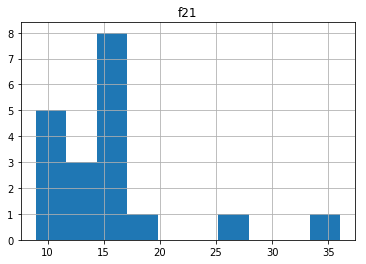

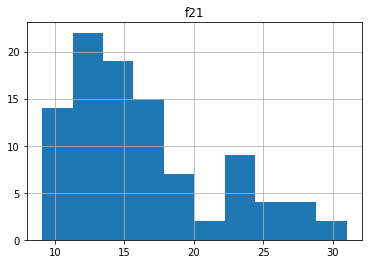

In [40]:
for i in range(0,testWbcd.shape[1]):
    if (testWbcd.isnull().sum())[i]>0:
        print(testWbcd.hist(column=testWbcd.columns.values[i]))
for i in range(0,trainWbcd.shape[1]):
    if (trainWbcd.isnull().sum())[i]>0:
        print(trainWbcd.hist(column=trainWbcd.columns.values[i]))

Both distribution are skewed to the right. As a result, the mean is not a good measure of central tendency for this feature.

*Therefore, I am using the median to replace null values for this feature in the training and testing dataset*

In [41]:
val_to_replace_nan = 0
for i in range(0,testWbcd.shape[1]):
    if (testWbcd.isnull().sum())[i]>0:
        val_to_replace_nan = testWbcd.iloc[:,i].median()
        testWbcd.iloc[:,i].fillna(val_to_replace_nan, inplace=True)
        
for i in range(0,trainWbcd.shape[1]):
    if (trainWbcd.isnull().sum())[i]>0:
        val_to_replace_nan = trainWbcd.iloc[:,i].median()
        trainWbcd.iloc[:,i].fillna(val_to_replace_nan, inplace=True)

In [42]:
# Objective 7: Normalize the training and testing data

# Replacing 'B' and 'M' with 0 and 1 prior to normalizing data
testWbcd['Diagnosis'].replace(to_replace='B',value=0,inplace=True)
testWbcd['Diagnosis'].replace(to_replace='M',value=1,inplace=True)   

trainWbcd['Diagnosis'].replace(to_replace='B',value=0,inplace=True)
trainWbcd['Diagnosis'].replace(to_replace='M',value=1,inplace=True)

# Normalizing the data
testNorm = scale(testWbcd.iloc[:,2:])
trainNorm = scale(trainWbcd.iloc[:,2:])

### 1.2: Logistic Regression
Objective: Train logistic regression models with L1 regularization and L2 regularization using alpha = 0.1 and lambda = 0.1. Report accuracy, precision, recall, f1-score and print the confusion matrix.

In [47]:
alpha_val=0.1
logistic_lasso = LogisticRegression(penalty='l1', C=1/alpha_val)
logistic_lasso.fit(trainNorm,trainWbcd['Diagnosis'])
logistic_lasso_predict = logistic_lasso.predict(testNorm)
print(('L1 Accuracy: {}').format(accuracy_score(testWbcd['Diagnosis'],logistic_lasso_predict)))
print(('L1 Precision: {}').format(precision_score(testWbcd['Diagnosis'],logistic_lasso_predict,average='macro')))
print(('L1 Recall: {}').format(recall_score(testWbcd['Diagnosis'],logistic_lasso_predict,average='macro')))
print(('L1 F1-Score: {}').format(f1_score(testWbcd['Diagnosis'],logistic_lasso_predict,average='macro')))
print('L1 Confusion Matrix:')
print(confusion_matrix(testWbcd['Diagnosis'],logistic_lasso_predict))

lambda_val=0.1
logistic_ridge = LogisticRegression(penalty='l2', C=1/lambda_val)
logistic_ridge.fit(trainNorm,trainWbcd['Diagnosis'])
logistic_ridge_predict = logistic_ridge.predict(testNorm)
print(('L2 Accuracy: {}').format(accuracy_score(testWbcd['Diagnosis'],logistic_ridge_predict)))
print(('L2 Precision: {}').format(precision_score(testWbcd['Diagnosis'],logistic_ridge_predict,average='macro')))
print(('L2 Recall: {}').format(recall_score(testWbcd['Diagnosis'],logistic_ridge_predict,average='macro')))
print(('L2 F1-Score: {}').format(f1_score(testWbcd['Diagnosis'],logistic_ridge_predict,average='macro')))
print('L2 Confusion Matrix:')
print(confusion_matrix(testWbcd['Diagnosis'],logistic_ridge_predict))

L1 Accuracy: 0.9
L1 Precision: 0.8809523809523809
L1 Recall: 0.8809523809523809
L1 F1-Score: 0.8809523809523809
L1 Confusion Matrix:
[[13  1]
 [ 1  5]]
L2 Accuracy: 0.9
L2 Precision: 0.8809523809523809
L2 Recall: 0.8809523809523809
L2 F1-Score: 0.8809523809523809
L2 Confusion Matrix:
[[13  1]
 [ 1  5]]


### 1.2: Choosing the best hyperparameter
Objectives:
1. For L1 model, choose the best alpha value from the following set: {0.1,1,3,10,33,100,333,1000, 3333, 10000, 33333}.
2. For L2 model, choose the best lambda value from the following set: {0.001, 0.003, 0.01, 0.03, 0.1,0.3,1,3,10,33}.
3. Discuss if there is any sign of underfitting or overfitting with appropriate reasoning.

In [48]:
# Objective 1: For L1 model, choose the best alpha value from the following set: {0.1,1,3,10,33,100,333,1000, 3333, 10000, 33333}.

alpha_vals=[0.1,1,3,10,33,100,333,1000, 3333, 10000, 33333]
predictors=list(trainWbcd.columns.values)[2:32]
model_acc =0
l1_acc=np.empty((len(alpha_vals),0))

for a in alpha_vals:
    for i in range(0,100):
        train,test=train_test_split(trainWbcd,test_size=0.3)
        enet = SGDClassifier(loss='log', penalty='l1', alpha=a, l1_ratio=1, max_iter=1000)
        enet.fit(train[predictors],train['Diagnosis'].values.reshape((train['Diagnosis'].shape[0],)))
        y_predict = enet.predict(test[predictors])
        y_predict = np.reshape(y_predict,np.shape(test['Diagnosis']))
        model_acc += accuracy_score(y_predict,test['Diagnosis'].values.reshape((test['Diagnosis'].shape[0],)))
    model_acc /= 100
    l1_acc=np.append(l1_acc,model_acc)
    
    if a==alpha_vals[len(alpha_vals)-1]:
        max_index_l1 = np.argmax(l1_acc)
        best_alpha = alpha_vals[max_index_l1]
        logistic_lasso = LogisticRegression(penalty='l1', C=1/best_alpha)
        logistic_lasso.fit(trainWbcd[predictors],trainWbcd['Diagnosis'])
        logistic_lasso_predict = logistic_lasso.predict(testWbcd[predictors])
        print(('L1 Accuracy: {}').format(accuracy_score(testWbcd['Diagnosis'],logistic_lasso_predict)))
        print(('L1 Precision: {}').format(precision_score(testWbcd['Diagnosis'],logistic_lasso_predict,average='macro')))
        print('L1 Confusion Matrix:')
        print(confusion_matrix(testWbcd['Diagnosis'],logistic_lasso_predict))
        coef = logistic_lasso.coef_
        desc_coef = -np.sort(-coef)
        print(('The best feature is: {}').format(predictors[(np.where(coef==desc_coef[:,0]))[1][0]]))
        print(('The 2nd best feature is: {}').format(predictors[(np.where(coef==desc_coef[:,1]))[1][0]]))
        print(('The 3rd best feature is: {}').format(predictors[(np.where(coef==desc_coef[:,2]))[1][0]]))
        print(('The 4th best feature is: {}').format(predictors[(np.where(coef==desc_coef[:,3]))[1][0]]))
        print(('The 5th best feature is: {}').format(predictors[(np.where(coef==desc_coef[:,4]))[1][0]]))

L1 Accuracy: 0.8
L1 Precision: 0.7708333333333333
L1 Confusion Matrix:
[[11  3]
 [ 1  5]]
The best feature is: f22
The 2nd best feature is: f23
The 3rd best feature is: f24
The 4th best feature is: f4
The 5th best feature is: f5


In [49]:
# Objective 2: For L2 model, choose the best lambda value from the following set: {0.001, 0.003, 0.01, 0.03, 0.1,0.3,1,3,10,33}.

lambda_vals=[0.001, 0.003, 0.01, 0.03, 0.1,0.3,1,3,10,33]
predictors=list(trainWbcd.columns.values)[2:32]
model_acc =0
l2_acc=np.empty((len(lambda_vals),0))

for l in lambda_vals:
    for i in range(0,100):
        train,test=train_test_split(trainWbcd,test_size=0.3)
        enet = SGDClassifier(loss='log', penalty='l2', alpha=l, l1_ratio=0, max_iter=1000)
        enet.fit(train[predictors],train['Diagnosis'].values.reshape((train['Diagnosis'].shape[0],)))
        y_predict = enet.predict(test[predictors])
        y_predict = np.reshape(y_predict,np.shape(test['Diagnosis']))
        model_acc += accuracy_score(y_predict,test['Diagnosis'].values.reshape((test['Diagnosis'].shape[0],)))
    model_acc /= 100
    l2_acc=np.append(l2_acc,model_acc)
    
    if l==lambda_vals[len(lambda_vals)-1]:
        max_index_l2 = np.argmax(l2_acc)
        best_lambda = lambda_vals[max_index_l2]
        logistic_ridge = LogisticRegression(penalty='l2', C=1/best_lambda)
        logistic_ridge.fit(trainWbcd[predictors],trainWbcd['Diagnosis'])
        logistic_ridge_predict = logistic_ridge.predict(testWbcd[predictors])
        print(('L2 Accuracy: {}').format(accuracy_score(testWbcd['Diagnosis'],logistic_ridge_predict)))
        print(('L2 Precision: {}').format(precision_score(testWbcd['Diagnosis'],logistic_ridge_predict,average='macro')))
        print('L2 Confusion Matrix:')
        print(confusion_matrix(testWbcd['Diagnosis'],logistic_ridge_predict))
        coef = logistic_ridge.coef_
        desc_coef = -np.sort(-coef)
        print(('The best feature is: {}').format(predictors[(np.where(coef==desc_coef[:,0]))[1][0]]))
        print(('The 2nd best feature is: {}').format(predictors[(np.where(coef==desc_coef[:,1]))[1][0]]))
        print(('The 3rd best feature is: {}').format(predictors[(np.where(coef==desc_coef[:,2]))[1][0]]))
        print(('The 4th best feature is: {}').format(predictors[(np.where(coef==desc_coef[:,3]))[1][0]]))
        print(('The 5th best feature is: {}').format(predictors[(np.where(coef==desc_coef[:,4]))[1][0]]))

L2 Accuracy: 0.85
L2 Precision: 0.8186813186813187
L2 Confusion Matrix:
[[12  2]
 [ 1  5]]
The best feature is: f22
The 2nd best feature is: f23
The 3rd best feature is: f27
The 4th best feature is: f26
The 5th best feature is: f13


**Objective 3: Discuss if there is any sign of underfitting or overfitting with appropriate reasoning.**

Overfitting and underfitting are performance issues in machine learning. It's important to consider whether the model is able to work with new data, as well as, with the data it was trained on. 

Overfitting occurs when the model learns the details and the noise. For both lasso (L1) and ridge (L2) logistic regression, my model performs fairly well (accuracies of 80% and 85%, respectively) on unseen data. Hence overfitting is not an issue here. 

Underfitting occurs when the model doesn't performn well on new data or on the data it was trained on. Since my L1 and L2 models perform well on unseen data, underfitting is not an issue here. 

## Part 2: Multiclass Classification
### 2.1: Read and understand the data, create a default One-vs-Rest Classifier
Objectives:
1. Read data from the provided csv file. Print the following information:
    * Number of data points
    * Total number of features
    * Unique labels in the data
2. Split the data into 70% training data and 30% test data. Fit a One-vs-Rest Classifier (which uses Logistic regression classifier with alpha=1) on training data, and report accuracy, precision, recall on testing data.

In [50]:
# Objective 1: Read data from the csv file provided and print number of data points, number of features and unique labels

data = pd.read_csv('reduced_mnist.csv',delimiter=",",header=0)

print('Number of data points: {}'.format(data.shape[0]*data.shape[1]))
print('Total number of features: {}'.format(data.shape[1]-1))
print('Unique labels in the data: {}'.format(data['label'].nunique()))

Number of data points: 1978200
Total number of features: 784
Unique labels in the data: 10


In [51]:
# Objective 2: Split the data into 70% training data and 30% test data. Fit a One-vs-Rest Classifier (which uses Logistic regression classifier with alpha=1) on training data, and report accuracy, precision, recall on testing data.

trainData, testData = train_test_split(data,test_size=0.3)
alpha_val = 1
classifier = OneVsRestClassifier(LogisticRegression(penalty='l1',C=1/alpha_val))
classifier.fit(trainData.drop(['label'],axis=1),trainData['label'])
prediction = classifier.predict(testData.drop(['label'],axis=1))
print('Accuracy: {}'.format(accuracy_score(testData['label'],prediction)))
print('Precision: {}'.format(precision_score(testData['label'],prediction,average='macro')))
print('Recall: {}'.format(recall_score(testData['label'],prediction,average='macro')))

Accuracy: 0.832010582010582
Precision: 0.8298588013919319
Recall: 0.8284788830209118


## 2.2: Choosing the best hyper-parameter
Objectives:

1. As in section **1.3** above, now create 10 random splits of training data into training and validation data. Choose the best value of alpha from the following set: {0.1, 1, 3, 10, 33, 100, 333, 1000, 3333, 10000, 33333}.
    * For each value of hyperparameter, perform 10 random splits of training data into training and validation data as said above. 
    * For each value of hyperparameter, use its 10 random splits and find the average training and validation accuracy.
    * On a graph, plot both the average training accuracy (in red) and average validation accuracy (in blue) w.r.t. each hyperparameter setting. Comment on this graph by identifying regions of overfitting and underfitting. 
    * Print the best value of alpha hyperparameter.
    
    
2. Evaluate the prediction performance on test data and report the following:

    * Total number of non-zero features in the final model.
    * The confusion matrix
    * Precision, recall and accuracy for each class.
    
    
3. Discuss if there is any sign of underfitting or overfitting with appropriate reasoning.

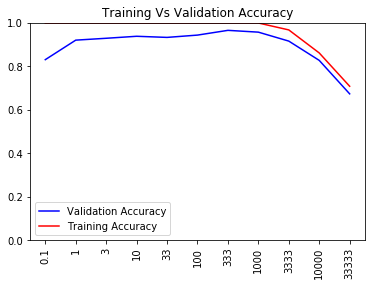

The best value of the hyperparameter is: 333


In [56]:
# Objective 1: As in section **1.3** above, now create 10 random splits of training data into training and validation data. Choose the best value of alpha from the following set: {0.1, 1, 3, 10, 33, 100, 333, 1000, 3333, 10000, 33333}.

alpha_vals = [0.1, 1, 3, 10, 33, 100, 333, 1000, 3333, 10000, 33333]
predictors = list(trainData.drop('label',axis=1).columns.values)
model_acc = 0
train_acc = 0
l1_model_acc=np.empty((len(alpha_vals),0))
l1_train_acc=np.empty((len(alpha_vals),0))
for a in alpha_vals:
    for i in range(0,10):
        train,test=train_test_split(data,test_size=0.3)
        classifier = OneVsRestClassifier(LogisticRegression(penalty='l1',C=1/a))
        classifier.fit(train.drop(['label'],axis=1),train['label'])
        selfPrediction = classifier.predict(train.drop(['label'],axis=1))
        selfPrediction = np.reshape(selfPrediction,np.shape(train['label']))
        prediction = classifier.predict(test.drop(['label'],axis=1))
        prediction = np.reshape(prediction,np.shape(test['label']))
        model_acc += accuracy_score(test['label'].values.reshape((test['label'].shape[0],)),prediction)
        train_acc += accuracy_score(train['label'].values.reshape((train['label'].shape[0],)),selfPrediction)
    model_acc /= 10
    train_acc /= 10
    l1_model_acc=np.append(l1_model_acc,model_acc)
    if train_acc > 1.0:
        train_acc = 1.0
        l1_train_acc=np.append(l1_train_acc,train_acc)
    else:
        l1_train_acc=np.append(l1_train_acc,train_acc)

plt.plot(range(0,len(alpha_vals)), l1_model_acc, color='b', label='Validation Accuracy')
plt.plot(range(0,len(alpha_vals)), l1_train_acc, color='r', label='Training Accuracy')
plt.xticks(range(0,len(alpha_vals)), alpha_vals, rotation='vertical')
plt.title('Training Vs Validation Accuracy')
axes = plt.gca()
axes.set_ylim([0, 1.0])
plt.legend(loc="lower left")
plt.show()

print('The best value of the hyperparameter is: {}'.format(alpha_vals[np.argmax(l1_model_acc)]))

**Comments on the graph 'Training Vs Validation Accuracy'**

Overfitting occurs when the model learns the details and the noise. In the graph above, the region of overfitting occurs when the model does not perform well on unseen data even though it performs really well on training data. For my model, alpha values of 0.1 and 1 can be deemed as regions of overfitting. 

Underfitting occurs when the model doesn't performn well on new data or on the data it was trained on. The region of underfitting occurs when the model does not perform well on either unseen data or the training data. For my model, alpha values of 3333, 10000 and 33333 cause underfitting.  

My model serves to highlight that cross-validation is invaluable for overfitting or underfitting. This is widely known across the industry and in academia.

In [54]:
# Objective 2: Evaluate the prediction performance on test data and report the requisite evaluation metrics

max_index_l1 = np.argmax(l1_model_acc)
best_alpha = alpha_vals[max_index_l1]
classifier = OneVsRestClassifier(LogisticRegression(penalty='l1',C=1/best_alpha))
classifier.fit(trainData.drop(['label'],axis=1),trainData['label'])
classifier_predict = classifier.predict(testData.drop(['label'],axis=1))

feature_coef = 0
count_nonzero = 0
for j in range(0,784):
    for i in range(0,10):
        feature_coef += classifier.estimators_[i].coef_[:,j]
    if feature_coef != 0:
        count_nonzero += 1
    feature_coef = 0

print('Total number of non-zero features: {}'.format(count_nonzero))
confusionMatrix = confusion_matrix(testData['label'],classifier_predict)

diagonalOfConfusionMatrix = np.diagonal(confusionMatrix)
print('Confusion Matrix:')
print(confusionMatrix)

target_names=['Class 0','Class 1','Class 2','Class 3','Class 4','Class 5','Class 6','Class 7','Class 8','Class 9']
print(classification_report(testData['label'],classifier_predict,target_names=target_names))

for i in range(0,10):
    print(('Accuracy of Class '+str(i)+': {}').format(round(np.sum(diagonalOfConfusionMatrix)/(np.sum(confusionMatrix[i])+np.sum(confusionMatrix[:,i])-(2*diagonalOfConfusionMatrix[i])+np.sum(diagonalOfConfusionMatrix)),2)))

Total number of non-zero features: 378
Confusion Matrix:
[[79  0  0  1  0  0  1  0  1  0]
 [ 0 77  1  1  0  0  0  0  1  0]
 [ 1  2 76  0  1  1  4  1  8  0]
 [ 0  1  3 70  0  3  1  0  1  2]
 [ 1  1  0  0 55  0  1  0  2  7]
 [ 1  1  0  4  2 39  0  0  6  1]
 [ 3  1  1  0  1  0 68  0  0  0]
 [ 1  2  4  1  2  0  0 63  1  4]
 [ 0  5  1  3  1  4  1  0 57  1]
 [ 3  0  0  0  5  0  0  2  4 59]]
             precision    recall  f1-score   support

    Class 0       0.89      0.96      0.92        82
    Class 1       0.86      0.96      0.91        80
    Class 2       0.88      0.81      0.84        94
    Class 3       0.88      0.86      0.87        81
    Class 4       0.82      0.82      0.82        67
    Class 5       0.83      0.72      0.77        54
    Class 6       0.89      0.92      0.91        74
    Class 7       0.95      0.81      0.88        78
    Class 8       0.70      0.78      0.74        73
    Class 9       0.80      0.81      0.80        73

avg / total       0.85     

**Objective 3: Discuss if there is any sign of underfitting or overfitting with appropriate reasoning**

My model does not show any signs of overfitting or underfitting. 

Overfitting occurs when the model learns the details and the noise. In my model, the prediction accuracies for each class are greater than 95% and the overall model accuracy is over 80%. This shows that my model has performed well on data that it had not seen prior to learning.

Underfitting occurs when the model doesn't performn well on new data or on the data it was trained on. In my model, the training accuracy for the best alpha value is over 100% (see graph 'Training Vs Validation Accuracy') and the accuracy on the test data is over 80%. This shows that my model performs well on data it was trained on, whilst also performing well on unseen data.

---
<div style="text-align: center">**END OF ASSIGNMENT TWO**</div>